# Worked Problems for Assessment, Computer Infrastructure Module  
Autumn 2025, Atlantic Technological University  
Author: Susan Collins  

## Problem 1: Data from yfinance  
Brief:
```
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

    Facebook (META)
    Apple (AAPL)
    Amazon (AMZN)
    Netflix (NFLX)
    Google (GOOG)

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.


### Importing libraries

In [1]:
# import NumPy to manipulate numerical arrays
import numpy as np
# import Python Data Analysis Library
import pandas as pd
# import Matplotlib.PyPlot for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# import yfinance for financial data for these exercises
# https://github.com/ranaroussi/yfinance
import yfinance as yf
# Library for handling date and time data, https://docs.python.org/3/library/datetime.html
import datetime as dt
# Library for interfacing with the operating system, https://docs.python.org/3/library/os.html
import os 
# Library for regular expressions, used for string matching
import re

### Downloading financial data  
The [yfinance documentation](https://ranaroussi.github.io/yfinance/) front page
contains a Quick Start guide.  
The [`yfinance.download`](https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html) function creates a Pandas DataFrame. 


_Note:  The call to `yfinance.download` produced a FutureWarning to alert users 
that the default value of the `auto_adjust` argument has changed. Should I
suppress this warning or look further into the uses of this argument?  
This [StackOverflow answer](https://stackoverflow.com/a/37453925) says that the auto_adjust parameter will adjust the historical stock prices for splits and dividends, so that long-term comparisons of stick prices can be made. As we are looking at prices over the span of 5 days, this parameter is very unlikely to have any effect on this analysis; but if I call it with its default value of True, it does suppress the annoying warning._

In [2]:

# Set list of stock tickers for which we want to download data
tickers = ['META','AAPL','AMZN','NFLX','GOOG']

# Function to download hourly finance data for specified stock trackers
def get_finance_data_hourly(ticker_list, period='5d'):
    """Download Yahoo Finance data for supplied list of trackers, default period 5 days."""

    # Use the yfinance.download function with multiple stock tickers
    downloaded_dataframe = yf.download(ticker_list, period=period, interval='1h', auto_adjust=True)

    # Look at the first 5 rows of the resulting DataFrame.
    print(f"Downloaded DataFrame Head: \n {downloaded_dataframe.head(5)}")
    return(downloaded_dataframe)

# Run this function
df_downloaded = get_finance_data_hourly(tickers)

[*********************100%***********************]  5 of 5 completed

Downloaded DataFrame Head: 
 Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   
2025-12-15 17:30:00+00:00  274.040009  222.375000  307.450012  650.219971   
2025-12-15 18:30:00+00:00  273.369995  223.222595  308.540009  651.219971   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-15 14:30:00+00:00  94.004997  280.049988  227.500000  311.359985   
2025-12-15 15:30:00+00:00  94.430000  275.640411  

### Creating output filename and output directory

In [3]:
# Function to generate the CSV filename for data output from the current time
def csv_filename_from_now():
    "Generate the CSV data output filename from the current time"
    # Current date and time.
    now = dt.datetime.now()

    # Show.
    print(f"Current date and time are {now}.")

    # Use datetime.datetime.strftime to create the output filename as a string, 
    # in the requested format.  
    # Handy cheat sheet for strftime format specifiers available at
    # https://strftime.org/ 
    csv_filename = now.strftime("%Y%m%d-%H%M%S.csv")
    print(f"Generated CSV filename is {csv_filename}.")

    # Return the 
    return csv_filename

# Run this function
data_output_filename = csv_filename_from_now()


Current date and time are 2025-12-19 17:02:47.633223.
Generated CSV filename is 20251219-170247.csv.


In [4]:
# Set the directory for the output CSV files.
data_output_dir = "data/"

# Function to check if a directory exists
def check_directory(directory_to_check):
    """Check if a specified directory exists, if not, create the directory."""
    if not os.path.isdir(directory_to_check):
        os.makedirs(directory_to_check)
        print(f"Created directory at {directory_to_check}")
    else:
        print(f"Directory exists at {directory_to_check}")

# Run this function
check_directory(data_output_dir)

Directory exists at data/


### Writing financial data to CSV file  
Pandas has a function [`pandas.DataFrame.to_csv`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) to write to CSV files.

In [5]:
# Function to download all hourly finance data, and export to CSV file
def get_data():
    # Download hourly stock data
    df_downloaded = get_finance_data_hourly(tickers)

    # Check for output data directory
    check_directory(data_output_dir)
    
    # Generate the filename fo the output data
    data_output_filename = csv_filename_from_now()

    # Write DataFrame to CSV file in data directory.
    df_downloaded.to_csv(data_output_dir + data_output_filename)
    print(f"Data written to {data_output_dir + data_output_filename}")

# Calling this function
get_data()

[*********************100%***********************]  5 of 5 completed


Downloaded DataFrame Head: 
 Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   
2025-12-15 17:30:00+00:00  274.040009  222.375000  307.450012  650.219971   
2025-12-15 18:30:00+00:00  273.369995  223.222595  308.540009  651.219971   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-15 14:30:00+00:00  94.004997  280.049988  227.500000  311.359985   
2025-12-15 15:30:00+00:00  94.430000  275.640411  

## Problem 2: Plotting Data  
Brief:  
```
Write a function called df_to_plot() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.


### Checking for the read-in  data directory  

This section of code may be run independently of the previous section, so we must  
check again that the data directory exists and that an appropriate CSV file is 
available.

In [6]:
# Set the directory from which to read CSV files.
data_read_dir = "data/"

# Check if this directory exists, using function defined above
check_directory(data_read_dir)

Directory exists at data/


### Finding the latest CSV file  
Approach: 
- List the files in the data directory
- Find those with appropriate filenames
- Sort them by name (which should be the file creation time)
- Get the name of the newest file

In [7]:
# Function to get the latest valid data file, using filename
def get_latest_valid_file(directory):
    """Return the file in a directory with the latest timestamp in the filename."""

    # List the files in the data_read directory
    files_in_directory = os.listdir(directory)

    # Filter for the files that match the expected data filename format,
    # i.e. YYYYMMDD-HHmmss.csv 
    # (adapted from https://stackoverflow.com/a/56223939) 
    # regex reference: https://www.w3schools.com/python/python_regex.asp

    # Search pattern to match valid data files
    search_pattern = r'[0-9]{8}[-][0-9]{6}\.csv$'
    # Create empty list to hold matching filenames
    files_match_pattern= []

    # Iterate through the files in the data_read directory and get the ones with 
    # filenames matching the pattern 
    for file in files_in_directory:
        if re.match(search_pattern, file):
            # If a filename matches the regex string, add it to the new list
            files_match_pattern.append(file)

    # Sort the filtered data files to get the latest one
    latest_filename = sorted(files_match_pattern, reverse=True)[0]

    # Print info for user:
    print(f"Directory {directory} contains {len(files_match_pattern)} files "
        f"with appropriate filenames: the latest one is {latest_filename}.")

    # Return the final data filename
    return(latest_filename)

# Run this function
data_read_filename = get_latest_valid_file(data_read_dir)
# Show the result
data_read_filename

Directory data/ contains 17 files with appropriate filenames: the latest one is 20251219-170247.csv.


'20251219-170247.csv'

### Reading in from the CSV file

In [8]:
def read_stock_data_from_csv(file):
    """Read stock data from a CSV file that was written from a yfinance download."""

    # Reading DataFrame from CSV file using pandas.read_csv()
    # (Ref: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).
    # Parameters:
    # header=[0,1] - The first two rows of the CSV file contain MultiIndex header information,
    # index_col=0 - I want column 0, the dates, to be the index of the resulting DataFrame,
    # parse_dates=[0] - I want the index values to be parsed as dates (i.e. as datetime objects.)
    # (adapted from https://stackoverflow.com/a/37453925)
    dataframe_read = pd.read_csv(file, header=[0,1], index_col=0, parse_dates=[0])

    # Print info to let the user know what has been done
    print(f"Read in: {file}")

    # Return the new DataFrame
    return dataframe_read


# Run this function
df_to_plot = read_stock_data_from_csv(data_read_dir + data_read_filename)
# Look at the first 5 rows of the read-in DataFrame.
df_to_plot.head(5)



Read in: data/20251219-170247.csv


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   
2025-12-15 17:30:00+00:00  274.040009  222.375000  307.450012  650.219971   
2025-12-15 18:30:00+00:00  273.369995  223.222595  308.540009  651.219971   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-15 14:30:00+00:00  94.004997  280.049988  227.500000  311.359985   
2025-12-15 15:30:00+00:00  94.430000  275.640411  224.389999  309.390015   
2025-12-15 16:30:00+00:00  94.000000  275.695007  224.500000  308.880005   
2025-12-15 17:30:00+00:00  93.644997  275.100006  223.080002  307.899994   
2025-12-15 18:30:00+00:00  93.959900  274.250000  223.434998  309.369995   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-15 14:30:00+00:00  649.650024  96.065002  ...  280.000000  227.000000   
2025-12-15 15:30:00+00:00  650.760010  94.559998  ...  274.170013  223.039993   
2025-12-15 16:30:00+00:00  651.390015  94.441002  ...  275.540009  224.440002   
2025-12-15 17:30:00+00:00  652.320007  94.230003  ...  274.924988  222.544998   
2025-12-15 18:30:00+00:00  652.159973  94.165001  ...  274.019989  222.380005   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-15 14:30:00+00:00  310.625000  644.250000  96.000000  8113962   
2025-12-15 15:30:00+00:00  307.730011  640.929993  94.004997  3495538   
2025-12-15 16:30:00+00:00  308.839996  650.619995  94.430000  2136284   
2025-12-15 17:30:00+00:00  306.239990  650.369995  94.004997  1992688   
2025-12-15 18:30:00+00:00  307.444794  650.099976  93.644997  2430153   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-15 14:30:00+00:00  6475168  3980818  2264723  5610795  
2025-12-15 15:30:00+00:00  2713407  1244270  1317447  2675928  
2025-12-15 16:30:00+00:00  2914110  1951626   846923  2181275  
2025-12-15 17:30:00+00:00  2010556  1006522   647454  2296090  
2025-12-15 18:30:00+00:00  2315546  1034648   545846  1941943  

[5 rows x 25 columns]

### Sanity check: compare downloaded and read-from-csv DataFrames  
For the purposes of this notebook, we can compare the downloaded DataFrame to 
the DataFrame read in from the CSV file. This will tell us if the file has been 
exported and read back in accurately.

The [`pandas.DataFrame.compare`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.compare.html) 
function lets us compare two DataFrames and returns another DataFrame showing 
non-matching values (and Nan where the values are a match.)


In [9]:
# Comparing the downloaded and read-from-file DataFrames.
df_to_plot.compare(df_downloaded).head()

Price                     Close                                           \
Ticker                     AAPL              AMZN             META         
                           self other        self       other self other   
Datetime                                                                   
2025-12-15 14:30:00+00:00   NaN   NaN         NaN         NaN  NaN   NaN   
2025-12-15 15:30:00+00:00   NaN   NaN         NaN         NaN  NaN   NaN   
2025-12-15 16:30:00+00:00   NaN   NaN         NaN         NaN  NaN   NaN   
2025-12-15 17:30:00+00:00   NaN   NaN         NaN         NaN  NaN   NaN   
2025-12-15 18:30:00+00:00   NaN   NaN  223.222595  223.222595  NaN   NaN   

Price                                           High        ...  Low        \
Ticker                          NFLX            AAPL        ... NFLX         
                                self      other self other  ... self other   
Datetime                                                    ...              
2025-12-15 14:30:00+00:00  94.004997  94.004997  NaN   NaN  ...  NaN   NaN   
2025-12-15 15:30:00+00:00        NaN        NaN  NaN   NaN  ...  NaN   NaN   
2025-12-15 16:30:00+00:00        NaN        NaN  NaN   NaN  ...  NaN   NaN   
2025-12-15 17:30:00+00:00        NaN        NaN  NaN   NaN  ...  NaN   NaN   
2025-12-15 18:30:00+00:00  93.959900  93.959900  NaN   NaN  ...  NaN   NaN   

Price                     Open                                         \
Ticker                    AAPL       AMZN       GOOG             NFLX   
                          self other self other self other       self   
Datetime                                                                
2025-12-15 14:30:00+00:00  NaN   NaN  NaN   NaN  NaN   NaN        NaN   
2025-12-15 15:30:00+00:00  NaN   NaN  NaN   NaN  NaN   NaN  94.004997   
2025-12-15 16:30:00+00:00  NaN   NaN  NaN   NaN  NaN   NaN        NaN   
2025-12-15 17:30:00+00:00  NaN   NaN  NaN   NaN  NaN   NaN  94.004997   
2025-12-15 18:30:00+00:00  NaN   NaN  NaN   NaN  NaN   NaN        NaN   

Price                                 
Ticker                                
                               other  
Datetime                              
2025-12-15 14:30:00+00:00        NaN  
2025-12-15 15:30:00+00:00  94.004997  
2025-12-15 16:30:00+00:00        NaN  
2025-12-15 17:30:00+00:00  94.004997  
2025-12-15 18:30:00+00:00        NaN  

[5 rows x 32 columns]

The `pandas.DataFrame.compare` function is showing many values as not identical, 
although they appear to be, due to the limited precision of floating-point 
representation in Python (e.g. [this article](https://www.geeksforgeeks.org/python/comparing-floating-points-number-for-almost-equality-in-python/).) 

Instead, we can use the `numpy.isclose()` function which can compare values with 
a small default tolerance level. (Suggested by [this StackOverflow answer](https://stackoverflow.com/a/33549675).)

In [10]:
# Sanity check.
# Compare the downloaded data to the data read from CSV, and show the first
# three rows of results 
print(np.isclose(df_downloaded,df_to_plot)[0:2,])

# Check if all the vales in the array of results are True,
# (adapted from https://stackoverflow.com/a/55834412 and 
# https://numpy.org/devdocs/reference/generated/numpy.ndarray.all.html#numpy.ndarray.all) 
df_comparison_result = np.isclose(df_downloaded,df_to_plot).all()

print(f"Are all values in the np.isclose result array True? {df_comparison_result}")

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]]
Are all values in the np.isclose result array True? False


### Preparing the plot output directory  
As before, we must check that the plot output directory exists, or create it.

In [11]:
# Setting the plot output directory
plot_dir = "plots/"

# Check if this directory exists, using function defined above
check_directory(plot_dir)

Directory exists at plots/


In [12]:
# Function to extract the datetime string from a supplied filename
# Adapted from https://stackoverflow.com/questions/3548673/how-can-i-replace-or-strip-an-extension-from-a-filename-in-python#comment126366159_3548689

def remove_filename_extension(file):
    """Removes the extension from a filename. Assumes maximum of 2 period characters in filename."""
    # Split the string at the period character and return the first part.
    string = file.rsplit( ".", 2 )[ 0 ]
    return string

# Run this function
data_timestamp_string = remove_filename_extension(data_read_filename)
# Show result
data_timestamp_string

'20251219-170247'

### Plotting the data  
Pandas has its own DataFrame plot function, [`Pandas.DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html), that calls Matplotlib.  

<Axes: xlabel='Datetime'>

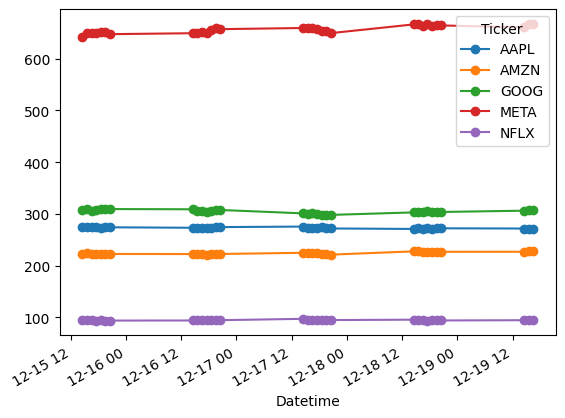

In [13]:
# plot the close prices in the DataFrame with markers for datapoints
df_to_plot["Close"].plot(marker="o")

The stock market data here shows large interpolated gaps, which correspond to times when the 
markets are closed. It is the convention for stock prices to be plotted so that 
we skip over these closed times. Will replot following the example in this 
[answer](https://stackoverflow.com/a/65836503) to a StackOverflow question, 
"Matplotlib: How to skip a range of hours when plotting with a datetime axis?"

Plot created at plots/20251219-170247.png


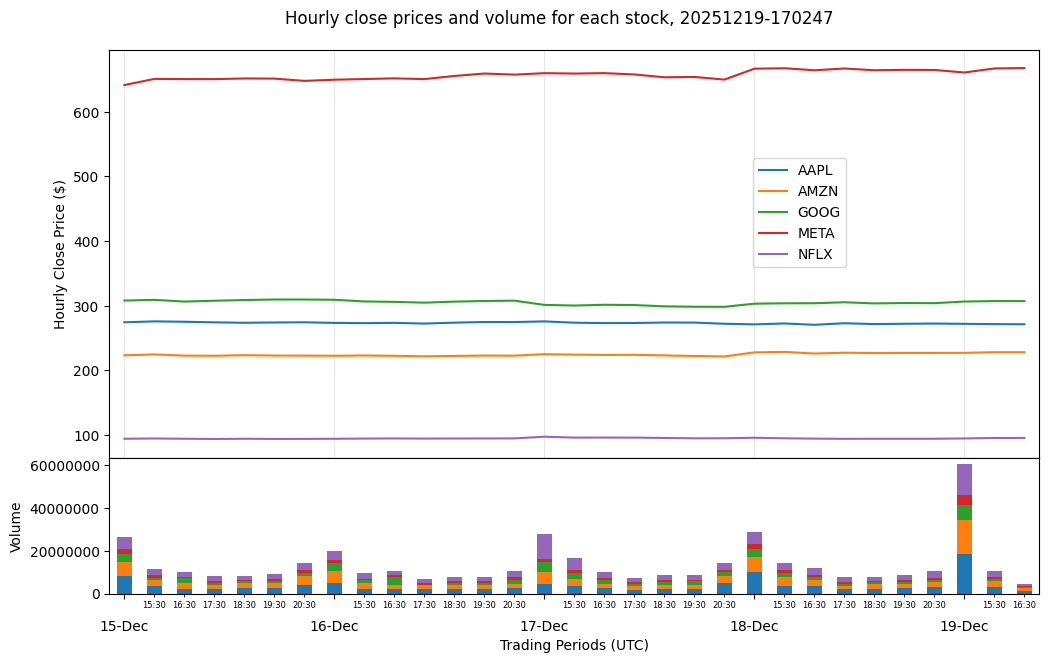

In [14]:
# Function to create PNG plot of supplied data into supplied directory.
def make_png_from_finance_data(dataframe, datetime_string, output_directory):

    # Create figure and matplotlib plots with some additional formatting
    fig, (top, bot) = plt.subplots(2, 1, sharex=True, figsize=(12,8),
                            gridspec_kw=dict(height_ratios=[0.75,0.25]))

    # remove vertical space between subplots
    fig.subplots_adjust(hspace=0)

    # plot Close prices and Volume on separate subplots. 
    # Close prices are plotted without using the datetimes in the data index, i.e. 
    # the periods are plotted all in sequence. 
    # Volume is a stacked bar plot. 
    dataframe["Close"].plot(ax=top, use_index=False)
    dataframe["Volume"].plot(ax=bot, kind='bar', stacked=True, legend=None)

    # set plot title including the timestamp in the name of the read CSV file
    plt.suptitle("Hourly close prices and volume for each stock, " + datetime_string, y=0.93)
    # set labels for x-axis and both y-axes
    bot.set_xlabel("Trading Periods (UTC)")
    bot.set_ylabel("Volume")
    top.set_ylabel("Hourly Close Price ($)")

    # Set fixed major and minor x-tick locations. 
    # Major tick is the start of each trading day at 14:30 UTC. 
    # Minor tick is every other hourly datapoint/  
    ticks_date = dataframe.index.indexer_at_time('14:30')
    ticks_time = np.arange(dataframe.index.size) # step in hours
    top.set_xticks(ticks_date)
    top.set_xticks(ticks_time, minor=True)

    # add vertical gridlines at the start of each day
    top.grid(axis='x', alpha=0.3)

    # set legend location
    top.legend(loc='center right', bbox_to_anchor=(0.8, 0.6))

    # Format major and minor tick labels
    bot.ticklabel_format(axis="y", style="plain")
    bot.tick_params(axis='x', which='minor', labelsize=6, rotation=90)
    labels_date = [maj_tick.strftime('\n%d-%b').replace('\n0', '\n')
                    for maj_tick in dataframe.index[ticks_date]]
    labels_time = [min_tick.strftime('%H:%M')
                    for min_tick in dataframe.index[ticks_time]]
    top.set_xticklabels(labels_date)
    top.set_xticklabels(labels_time, minor=True)
    top.figure.autofmt_xdate(rotation=0, ha='center', which='both')

    # Save plot to file
    plt.savefig(output_directory + datetime_string + ".png")

    # Print message for user
    print(f"Plot created at {output_directory + datetime_string}.png")

# Run this function
make_png_from_finance_data(df_to_plot, data_timestamp_string, plot_dir)



### Putting it all together

Directory exists at data/
Directory data/ contains 17 files with appropriate filenames: the latest one is 20251219-170247.csv.
Read in: data/20251219-170247.csv
Plot created at plots/20251219-170247.png


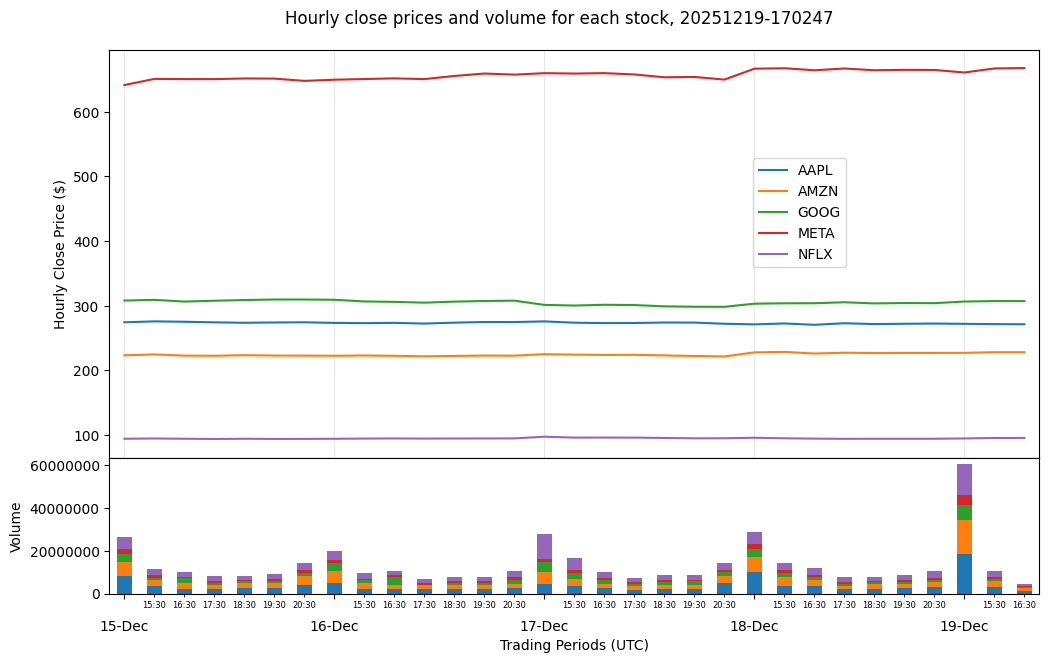

In [15]:
# Function to open latest data file, plot the Close prices, and save as PNG
def plot_data():
    """Function to open latest data file, plot the Close prices, and save as PNG"""

    # Check if the data directory exists
    check_directory(data_read_dir)

    # Get the filename of the latest valid data file in the data directory 
    data_read_filename = get_latest_valid_file(data_read_dir)

    # Read stock data from csv into dataframe
    df_to_plot = read_stock_data_from_csv(data_read_dir + data_read_filename)

    # Get the timestamp of the data from the CSV filename
    data_timestamp_string = remove_filename_extension(data_read_filename)

    # Create PNG plot of the data
    make_png_from_finance_data(df_to_plot, data_timestamp_string, plot_dir)

# Run this function
plot_data()
    

## Problem 3: Script
Brief:  
``` 
Create a Python script called faang.py in the root of your repository. Copy the above functions into it and make it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.
```

### Creating the `faang.py` script

To create the `faang.py` script, the following items are placed in a text file called `faany.py` in the root of the repository:
- all of the library imports at the start of this notebook
- all of the functions defined in this notebook
- definition statements for the variables
    * `tickers`
    * `data_output_dir`
    * `data_read_dir`
    * `plot_dir`
- statements to call the two major functions
    * `get_data()`
    * `plot_data()`

### Adding shebang line to `faang.py` script  
The line `#! /usr/bin/env python` is inserted as the first line of the `faang.py` script. This tell the terminal which interpreter to use to interpret the script file. In this case, the shebang instructs the shell to use the first interpreter in the environment's path.

(ref [StackOverflow: Why do people write "#!/usr/bin/env python" on the first line of a Python script?](https://stackoverflow.com/questions/2429511/why-do-people-write-usr-bin-env-python-on-the-first-line-of-a-python-script))

### Changing the file permissions on `faang.py` to allow execution  

After creation, the file `faang.py` has read and write permissions, meaning that it can be read and written to but cannot be executed as a script.   
This can be seen using `ls -l ./faang.py`, which shows read-write (`rw-`) permissions for each of the user (file owner), group (users in the same group as the file owner), and others (all other users.)  
(As I am using a GitHub codespace for this exercise, my user is `codespace`.)

``` 
~ (main) $ ls -l ./faang.py
-rw-rw-rw- 1 codespace codespace 8881 Dec 19 16:26 ./faang.py
```

To change the file permissions, I use the shell command `chmod` and supply the parameter `755`. (Ref [Wikipedia: Chmod](https://en.wikipedia.org/wiki/Chmod))  
This parameter uses octal values to indicate the desired permissions:
- user class: read, write, and execute; 7 => (4 + 2 + 1)
- group class: read and execute; 5 => (4 + 1)
- others class: read and execute; 5 => (4 + 1)

```  
~ (main) $ chmod 755 ./faang.py
```

I can use `ls -l ./faang.py` again to see the changed access permissions on this file:

```
~ (main) $ ls -l ./faang.py
-rwxr-xr-x 1 codespace codespace 8881 Dec 19 16:26 ./faang.py
```

This set of permissions is useful in a multi-user enviroment, as it allows other users to see and use my scripts but not modify them.

## Problem 4: Automation  
Brief:  
```

Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning.
The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository.
In your notebook, explain each of the individual lines in your workflow.
```

## End